In [5]:
import torch
import torchsummary
from torchsummary import summary
from torchvision import models

import copy
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import os
import yaml

In [6]:
import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

resultsdir = path_prefix + '/Results/Symbio/Symbio/'

In [7]:
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [8]:
all_paths = getListOfFiles(resultsdir)

### RMSpropRMSprop

0


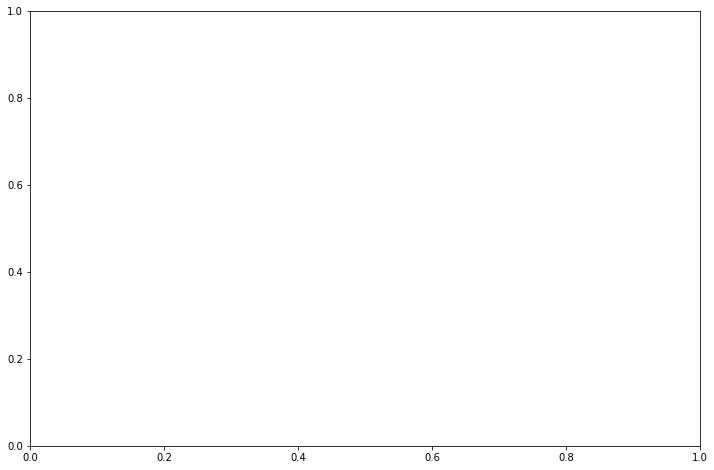

In [23]:
hashname = 'RMSpropRMSpropMNISTFullyConn' #'RMSpropRMSpropMNISTAsymResLNet10' 
methods = ['SLVanilla','BP', 'FA']
colors = {'FA':'gray', 'BP':'k', 'SLVanilla':'lime'}

with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname) as f:
    Lines = f.readlines() 

valid_runnames = []
fig, ax = plt.subplots(1,1, figsize=(12,8))
for l in Lines:
    runname = l.strip('\n')
    
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        if os.path.exists(p):
            df = pd.read_csv(p)
            if len(list(df['test_acc'])) == configs['epochs']:
                list_csv_paths.append(p)
    if len(list_csv_paths) == len(methods):
        valid_runnames.append(runname)
        configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

print(len(valid_runnames))

n_epochs = configs['epochs']
arch =  configs['arche'][:-1]

test_init = np.zeros((len(valid_runnames),n_epochs))
test_acc_dict = {}
test_corrd_dict = {}
test_lossd_dict = {}
for method in methods:
    test_acc_dict[method] = copy.deepcopy(test_init)
    test_corrd_dict[method] = copy.deepcopy(test_init)
    test_lossd_dict[method] = copy.deepcopy(test_init)
    
for r, runname in enumerate(valid_runnames):
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        df = pd.read_csv(p)
        label = method 
        pl = ax.plot(df['test_corrd'], label=label)
        test_acc_dict[method][r] = list(df['test_acc'])
        test_corrd_dict[method][r] = list(df['test_corrd'])
        test_lossd_dict[method][r] = list(df['test_lossd'])
        

/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting=&#39;unsafe&#39;, subok=False)
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  &quot;&quot;&quot;
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting=&#39;unsafe&#39;, subok=False)
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom &lt;= 0 for slice
  keepdims=keepdims)
/home/tt2684/conda-envs/pyt

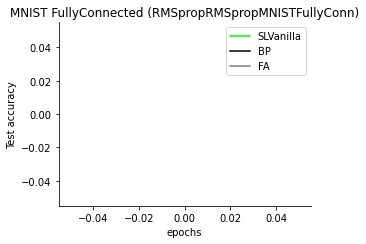

In [24]:
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
measure = test_acc_dict
for method in methods:
    ax.plot(range(n_epochs ), measure[method].mean(0), colors[method], label=method)
    ax.fill_between(range(n_epochs ), measure[method].mean(0)-measure[method].std(0),
                    measure[method].mean(0)+measure[method].std(0), alpha=0.1, color=colors[method])
ax.legend()
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y', direction='out', right=False)
plt.tick_params(axis='x', direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test accuracy')

ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
plt.tight_layout()

fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_acc_%s.png'%(hashname, arch), dpi=200)
fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_acc_%s.pdf'%(hashname, arch), dpi=200)


/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting=&#39;unsafe&#39;, subok=False)
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  &quot;&quot;&quot;
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting=&#39;unsafe&#39;, subok=False)
/home/tt2684/conda-envs/pytorch_tensorflow_latest/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom &lt;= 0 for slice
  keepdims=keepdims)
/home/tt2684/conda-envs/pyt

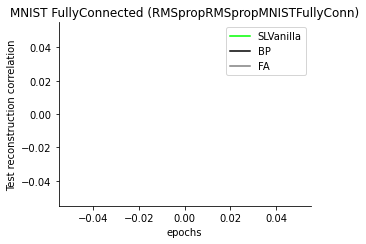

In [25]:
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
measure = test_corrd_dict
for method in methods:
    ax.plot(range(n_epochs ), measure[method].mean(0), colors[method], label=method)
    ax.fill_between(range(n_epochs ), measure[method].mean(0)-measure[method].std(0),
                    measure[method].mean(0)+measure[method].std(0), alpha=0.1, color=colors[method])
ax.legend()
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test reconstruction correlation')

ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
plt.tight_layout()
fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_corrd_%s.png'%(hashname, arch), dpi=200)
fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_corrd_%s.pdf'%(hashname, arch), dpi=200)

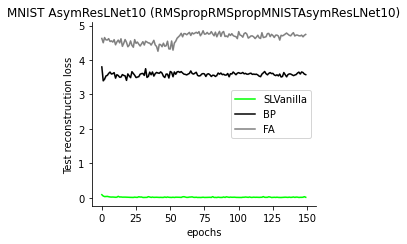

In [22]:
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
measure = test_lossd_dict
for method in methods:
    ax.plot(range(n_epochs ), measure[method].mean(0), colors[method], label=method)
    ax.fill_between(range(n_epochs ), measure[method].mean(0)-measure[method].std(0),
                    measure[method].mean(0)+measure[method].std(0), alpha=0.1, color=colors[method])
ax.legend()
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test reconstruction loss')

ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
plt.tight_layout()
fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_loss_%s.png'%(hashname, arch), dpi=200)
fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_loss_%s.pdf'%(hashname, arch), dpi=200)

In [ ]:
print(np.sum(test_acc_dict['BP']-test_acc_dict['FA']))
print(np.sum(test_acc_dict['SLVanilla']-test_acc_dict['FA']))
print(np.sum(test_acc_dict['SLVanilla']-test_acc_dict['BP']))

In [14]:
test_acc_dict['BP']

array([[37.099, 88.592, 87.851, 90.555, 90.705, 89.623, 87.891, 86.999,
        89.373, 82.772, 87.36 , 87.77 , 89.894, 88.311, 87.67 , 86.569,
        86.348, 87.851, 80.238, 84.485, 87.871, 80.319, 86.699, 87.79 ,
        88.231, 84.816, 79.307, 86.008, 89.273, 88.361, 84.505, 87.991,
        89.002, 84.385, 85.176, 90.154, 82.752, 85.076, 84.926, 88.582,
        86.288, 85.497, 78.265, 87.37 , 85.687, 78.726, 85.527, 85.016,
        88.071, 73.778, 82.853, 83.934, 81.571, 83.053, 80.298, 88.121,
        93.68 , 94.661, 95.923, 94.591, 95.553, 94.451, 95.613, 96.014,
        96.815, 96.615, 96.304, 96.484, 96.214, 96.294, 95.923, 96.755,
        96.905, 96.595, 96.254, 95.944, 95.743, 96.034, 95.603, 96.605,
        95.933, 97.145, 97.135, 96.404, 97.095, 96.965, 97.196, 96.755,
        96.484, 97.025, 97.216, 96.765, 97.075, 97.256, 97.206, 96.294,
        96.935, 96.544, 96.625, 96.264, 97.015, 96.975, 96.905, 96.805,
        97.246, 96.715, 96.905, 96.645, 97.306, 96.855, 96.585, 

SLVanilla 0.3518908421198527 97.46600000000001 RMSprop RMSprop 0.001 0.0001 1e-05 1e-05
FA -0.0009337944767396086 97.406 RMSprop RMSprop 0.001 0.0001 1e-05 1e-05
BP -0.0012704646420062114 97.96700000000001 RMSprop RMSprop 0.001 0.0001 1e-05 1e-05
SLVanilla 0.042479730426118925 97.71600000000001 SGD RMSprop 0.01 0.001 1e-05 1e-05
FA 0.025739003928043902 97.736 SGD RMSprop 0.01 0.001 1e-05 1e-05
BP 0.02690558627438851 97.666 SGD RMSprop 0.01 0.001 1e-05 1e-05
SLVanilla 0.7251534981605334 94.191 SGD RMSprop 0.001 0.001 0.001 0.001
FA -0.015016010675865868 94.241 SGD RMSprop 0.001 0.001 0.001 0.001
BP -0.015012950684206609 94.0 SGD RMSprop 0.001 0.001 0.001 0.001
SLVanilla 0.7183015331243857 94.471 SGD RMSprop 0.001 0.001 1e-05 0.001
FA -0.0016113225688175776 94.48100000000001 SGD RMSprop 0.001 0.001 1e-05 0.001
BP -0.0024386983365193605 94.411 SGD RMSprop 0.001 0.001 1e-05 0.001
SLVanilla 0.7154889718080178 96.554 SGD RMSprop 0.01 0.001 0.001 0.001
FA -0.004404389977049178 96.554 SGD RMSp

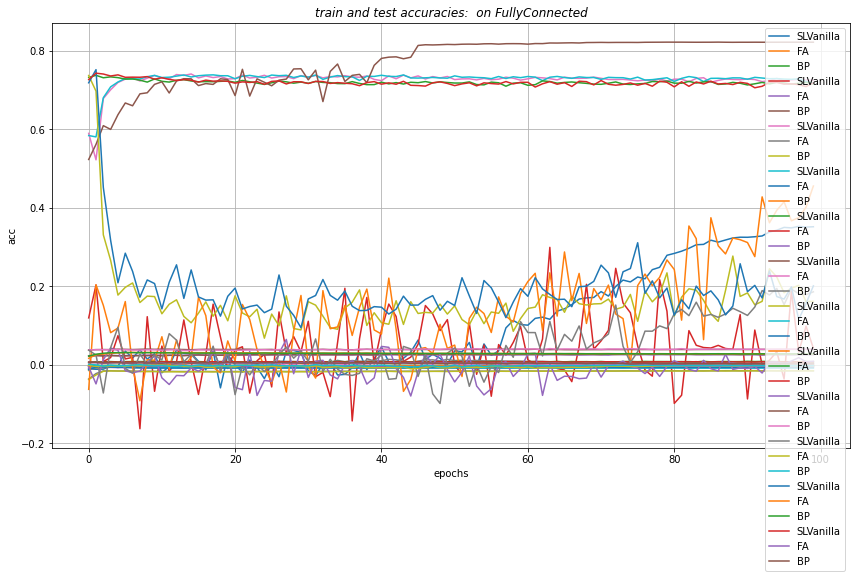

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

all_paths = getListOfFiles(resultsdir)
arch =  'FullyConnected'#'resnet101'
# results_dict = {'BP':[], 'FA':[], 'SLVanilla':[]}
acc_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}
lossd_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}
corrd_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}

n = 0
for p in all_paths:
    if ('training_results' in p)  and ( 'Sep' in p):
        df = pd.read_csv(p)
        # print(p)
        method = p.split('.')[0].split('_')[-1]
        # print(method)
        configs = yaml.safe_load(open(p.strip('training_results_%s.csv'%method)+'configs.yml', 'r'))
        
        label = method #configs['note']
        # pl = ax.plot(df['test_acc'], label=label)
        # if method == 'SLVanilla':
        print(method, list(df['test_corrd'])[-1], list(df['test_acc'])[-1], configs['optimizerF'], configs['optimizerB'], configs['lrF'], configs['lrB'], configs['wdF'], configs['wdB'])
        pl = ax.plot(df['test_corrd'], label=label)
        # results_dict[method].append(list(df['test_acc'])[-50])
        acc_test_dict[method] += list(df['test_acc'])
        lossd_test_dict[method] += list(df['test_lossd'])
        corrd_test_dict[method] += list(df['test_corrd'])
        # ax.plot(df['train_acc'], label=label, ls='--', color=pl[0].get_color())
        n += 1

        
        
ax.set_xlabel('epochs')
ax.set_ylabel('acc')
ax.legend()
title = 'train and test accuracies:  on %s'% ( arch)
ax.set_title(title, y=1, style='oblique')
ax.grid()
plt.tight_layout()

# fig.savefig(resultsdir + 'test_acc_%s_%s.png'%(arch, method), dpi=200)
# fig.savefig(resultsdir + 'test_acc_%s_%s.pdf'%(arch, method), dpi=200)

In [68]:
n/3

12.0

(94.0, 98.0)

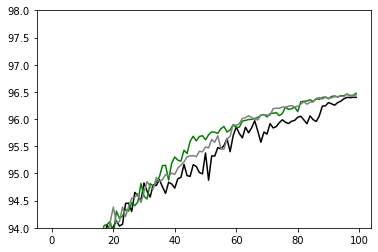

In [66]:
plt.plot(acc_test_dict['BP']/12,'k')
plt.plot(acc_test_dict['SLVanilla']/12,'g')
plt.plot(acc_test_dict['FA']/12,'gray')
plt.ylim([94,98])

[&lt;matplotlib.lines.Line2D at 0x2ae3c47905c0&gt;]

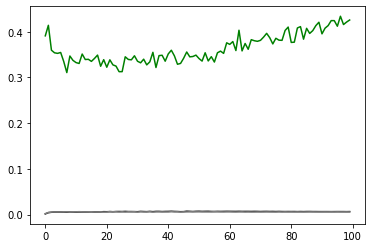

In [71]:
plt.plot(corrd_test_dict['BP']/12,'k')
plt.plot(corrd_test_dict['SLVanilla']/12,'g')
plt.plot(corrd_test_dict['FA']/12,'gray')

(0.0, 40000.0)

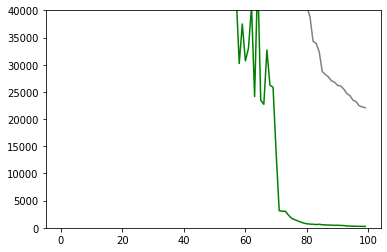

In [77]:
plt.plot(lossd_test_dict['BP']/12,'k')
plt.plot(lossd_test_dict['SLVanilla']/12,'g')
plt.plot(lossd_test_dict['FA']/12,'gray')
plt.ylim([0,40000])


In [53]:
np.mean(results_dict['BP'],0), np.std(results_dict['BP'])

(1133.8692800000001, 40.86001538670293)

In [48]:
np.mean(results_dict['SLVanilla']), np.std(results_dict['SLVanilla'])

(95.61958333333332, 2.040276225511853)

In [49]:
np.mean(results_dict['FA']), np.std(results_dict['FA'])

(95.48608333333333, 1.9930376923318731)

SLVanilla 0.8016757766405741 98.367 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
FA -0.009008290395379448 98.26700000000001 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP -0.010590255860454187 98.387 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP -0.0036310320834579608 98.257 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP -0.016137073986614358 98.07700000000001 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
FA 0.006110930981007046 98.307 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP 0.007120265285126292 98.387 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
FA -0.0033863993661585627 98.34700000000001 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP -0.0050796173842779044 98.367 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
SLVanilla 0.8258214348401779 98.40700000000001 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
FA 0.014101986785252126 98.417 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
BP 0.017545645555051472 98.34700000000001 RMSprop RMSprop 0.0001 0.0001 1e-05 1e-05
SLVanilla 0.8120538714604499 98.43799999999999 RMS

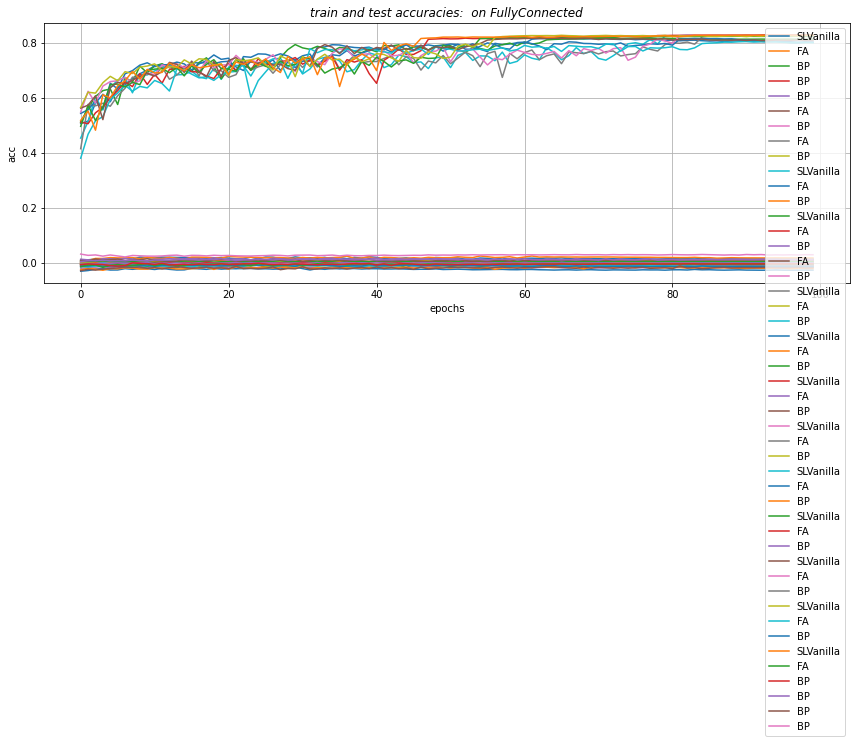

In [98]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

all_paths = getListOfFiles(resultsdir)
arch =  'FullyConnected'#'resnet101'
# results_dict = {'BP':[], 'FA':[], 'SLVanilla':[]}
acc_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}
lossd_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}
corrd_test_dict = {'BP':np.zeros(100), 'FA':np.zeros(100), 'SLVanilla':np.zeros(100)}

n = 0
for p in all_paths:
    if ('training_results' in p)  and ( 'RMSpropRMSprop' in p):
        df = pd.read_csv(p)
        # print(p)
        method = p.split('.')[0].split('_')[-1]
        # print(method)
        configs = yaml.safe_load(open(p.strip('training_results_%s.csv'%method)+'configs.yml', 'r'))
        
        label = method #configs['note']
        # pl = ax.plot(df['test_acc'], label=label)
        # if method == 'SLVanilla':
        if len(list(df['test_corrd'])) == 100:
            print(method, list(df['test_corrd'])[-1], list(df['test_acc'])[-1], configs['optimizerF'], configs['optimizerB'],             configs['lrF'], configs['lrB'], configs['wdF'], configs['wdB'])
            pl = ax.plot(df['test_corrd'], label=label)
            # results_dict[method].append(list(df['test_acc'])[-50])
            acc_test_dict[method] += list(df['test_acc'])
            lossd_test_dict[method] += list(df['test_lossd'])
            corrd_test_dict[method] += list(df['test_corrd'])
            # ax.plot(df['train_acc'], label=label, ls='--', color=pl[0].get_color())
            n += 1

        
        
ax.set_xlabel('epochs')
ax.set_ylabel('acc')
ax.legend()
title = 'train and test accuracies:  on %s'% ( arch)
ax.set_title(title, y=1, style='oblique')
ax.grid()
plt.tight_layout()

# fig.savefig(resultsdir + 'test_acc_%s_%s.png'%(arch, method), dpi=200)
# fig.savefig(resultsdir + 'test_acc_%s_%s.pdf'%(arch, method), dpi=200)

In [99]:
n/3


15.666666666666666

[&lt;matplotlib.lines.Line2D at 0x2ae3c38fd0b8&gt;]

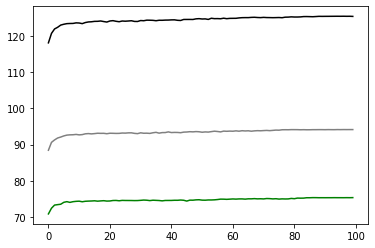

In [100]:
plt.plot(acc_test_dict['BP']/(n/3),'k')
plt.plot(acc_test_dict['SLVanilla']/(n/3),'g')
plt.plot(acc_test_dict['FA']/(n/3),'gray')
# plt.ylim([94,98])

In [50]:
runname='May05-22-35_CIFAR10_adf3aac7c7_778'
class Args:
    config_file = '/home/tt2684/Research/Results/Symbio/Symbio/%s/configs.yml'%runname
    method = 'BP'#'IA'#'SLVanilla'

In [32]:

import argparse
import os
import random
import shutil
import time
import warnings

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from tensorboardX import SummaryWriter

import torch.nn as nn
import torch.optim as optim
import torchvision
import yaml 
import os
import copy
import json
import numpy as np
import scipy.stats as ss
import scipy
import h5py
import random
import argparse
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib
import matplotlib.pylab as plt
matplotlib.use('agg')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

from utils import state_dict_utils

import pytorch_ssim


# # toggle_state_dict = state_dict_utils.toggle_state_dict # for ResNetLraveled
# toggle_state_dict = state_dict_utils.toggle_state_dict_resnets # for custom_resnets
# toggle_state_dict_YYtoBP = state_dict_utils.toggle_state_dict_YYtoBP

# # from models import custom_models_ResNetLraveled as custom_models
# from models import custom_resnets as custom_models

model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

# parser = argparse.ArgumentParser(description='PyTorch Training')
# parser.add_argument(
#         '--config-file',
#         dest='config_file',
#         type=argparse.FileType(mode='r'))


# parser.add_argument('--method', type=str, default='BP', metavar='M',
#                     help='method:BP|SLVanilla|SLBP|FA|SLTemplateGenerator')


args = Args()
assert args.config_file, 'Please specify a config file path'
if args.config_file:
    with open(args.config_file, 'r') as stream:
        data = yaml.safe_load(stream)        
#     delattr(args, 'config_file')
    arg_dict = args.__dict__
    for key, value in data.items():
        setattr(args, key, value)

pp.pprint(arg_dict)
print(args.method)
with open(args.resultsdir+'args.yml', 'w') as outfile:
    
    yaml.dump(vars(args), outfile, default_flow_style=False)

writer = SummaryWriter(log_dir=args.tensorboarddir)

{   'archd': 'asymresnetT18',
    'arche': 'asymresnet18',
    'base_channels': 64,
    'batch_size': 256,
    'customdatasetdir_train': '/home/tt2684/Research/Data/Custom_datasets/CIFAR10/',
    'databasedir': '/home/tt2684/Research/Results/database/Symbio/Easymresnet18DasymresnetT18/CIFAR10/',
    'dataset': 'CIFAR10',
    'dist_backend': 'nccl',
    'dist_url': 'tcp://224.66.41.62:23456',
    'epochs': 500,
    'evaluate': False,
    'factord': 0.1,
    'factore': 0.1,
    'gamma': 0.001,
    'gpu': None,
    'hash': None,
    'imagesetdir': '/home/tt2684/Research/Data/CIFAR10/',
    'input_size': 32,
    'loadinitialization': '',
    'lossfuncB': 'MSELoss',
    'lrB': 0.001,
    'lrF': 0.001,
    'momentum': 0.9,
    'multiprocessing_distributed': False,
    'n_classes': 10,
    'note': '**simple_modules_GOG**',
    'offset': 10,
    'optimizerB': 'RMSprop',
    'optimizerF': 'RMSprop',
    'path_prefix': '/home/tt2684/Research',
    'path_save_model': '/home/tt2684/Research/Models

In [36]:
if __name__ == '__main__':
    main()

ValueError: optimizer got an empty parameter list

In [35]:



if 'AsymResLNet' in args.arche:
    toggle_state_dict = state_dict_utils.toggle_state_dict_normalize
    from models import custom_models_ResNetLraveled as custom_models

elif 'asymresnet' in args.arche:
    toggle_state_dict = state_dict_utils.toggle_state_dict_resnets
    from models import custom_resnets as custom_models

elif args.arche.startswith('resnet'):
    from models import resnets as custom_models
    #just for compatibality
    toggle_state_dict = state_dict_utils.toggle_state_dict_resnets

toggle_state_dict_YYtoBP = state_dict_utils.toggle_state_dict_YYtoBP

# project = 'SYY2020' #'SYY-MINST'
# # ---------- path to save data and models
# #print(socket.gethostname())
# if socket.gethostname()[0:4] in  ['node','holm','wats']:
#     path_prefix = '/rigel/issa/users/Tahereh/Research'
# elif socket.gethostname() == 'SYNPAI':
#     path_prefix = '/hdd6gig/Documents/Research'
# elif socket.gethostname()[0:2] == 'ax':
#     path_prefix = '/scratch/issa/users/tt2684/Research'
# arch = 'E%sD%s'%(args.arche, args.archd)
# # rundatetime = args.time#datetime.now().strftime('%b%d_%H-%M')

# run_id = args.runname #'%s_%s_%s'%(rundatetime, commit.split('_')[0], socket.gethostname()[0:4] )

# tensorboarddir = path_prefix + '/Results/Tensorboard_runs/runs'+'/%s/'%project +run_id
# args.path_prefix = path_prefix
# args.path_save_model = path_prefix+'/Models/%s_trained/%s/%s/%s/'%(args.dataset,project,arch,run_id)
# #print(args.path_save_model)
# # args.databasedir = path_prefix+'/Results/database/%s/%s/%s/'%(project,arch,args.dataset)
# imagesetdir = path_prefix+'/Data/%s/'%args.dataset
# customdatasetdir_train = path_prefix+'/Data/Custom_datasets/%s/'%args.dataset
# path_list = [args.path_save_model, args.databasedir, imagesetdir,customdatasetdir_train, tensorboarddir]



# for path in path_list:
#     if not(os.path.exists(path)):
#         try:
#             os.makedirs(path)
#         except FileExistsError:
#             pass

best_acce = 0
best_lossd = 10


def main():

    if args.seed is not None:
        random.seed(args.seed)
        torch.manual_seed(args.seed)
        cudnn.deterministic = True
        warnings.warn('You have chosen to seed training. '
                      'This will turn on the CUDNN deterministic setting, '
                      'which can slow down your training considerably! '
                      'You may see unexpected behavior when restarting '
                      'from checkpoints.')

    if args.gpu is not None:
        warnings.warn('You have chosen a specific GPU. This will completely '
                      'disable data parallelism.')

    if args.dist_url == "env://" and args.world_size == -1:
        args.world_size = int(os.environ["WORLD_SIZE"])

    args.distributed = args.world_size > 1 or args.multiprocessing_distributed

    ngpus_per_node = torch.cuda.device_count()
    if args.multiprocessing_distributed:
        # Since we have ngpus_per_node processes per node, the total world_size
        # needs to be adjusted accordingly
        args.world_size = ngpus_per_node * args.world_size
        # Use torch.multiprocessing.spawn to launch distributed processes: the
        # main_worker process function
        mp.spawn(main_worker, nprocs=ngpus_per_node, args=(ngpus_per_node, args))
    else:
        # Simply call main_worker function
        main_worker(args.gpu, ngpus_per_node, args)



def main_worker(gpu, ngpus_per_node, args):
    global best_acce, best_lossd
    args.gpu = gpu

    if args.gpu is not None:
        print("Use GPU: {} for training".format(args.gpu))

    if args.distributed:
        if args.dist_url == "env://" and args.rank == -1:
            args.rank = int(os.environ["RANK"])
        if args.multiprocessing_distributed:
            # For multiprocessing distributed training, rank needs to be the
            # global rank among all the processes
            args.rank = args.rank * ngpus_per_node + gpu
        dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                                world_size=args.world_size, rank=args.rank)
    # create model
    if args.dataset == 'imagenet':
        args.n_classes = 1000
        if args.input_size is None:
            input_size = 224
        else:
            input_size = args.input_size
        image_channels = 3
        
    elif args.dataset == 'CIFAR10':
        args.n_classes = 10
        if args.input_size is None:
            input_size = 32
        else:
            input_size = args.input_size
        image_channels = 3
        train_mean = (0.4914, 0.4822, 0.4465)
        train_std = (0.2023, 0.1994, 0.2010)
        classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    elif args.dataset == 'CIFAR100':
        args.n_classes = 100
        if args.input_size is None:
            input_size = 32
        else:
            input_size = args.input_size
        image_channels = 3

        train_mean = (0.5070751592371323, 0.48654887331495095, 0.4409178433670343)
        train_std = (0.2673342858792401, 0.2564384629170883, 0.27615047132568404)

        
    elif 'MNIST' in args.dataset:
        args.n_classes = 10
        if args.input_size is None:
            input_size = 32
        else:
            input_size = args.input_size
        image_channels = 1
    
        
    
    # create encoder and decoder model
    def get_model(arch, agpu=args.gpu, args_model={}):
        if arch in model_names:
            if args.pretrained:
                print("=> using pre-trained model '{}'".format(arch))
                model = models.__dict__[arch](pretrained=True)
            else:
                print("=> creating model '{}'".format(arch))
                model = models.__dict__[arch]()
        else:
            model = getattr(custom_models,arch)(**args_model) 

        if args.distributed:
            # For multiprocessing distributed, DistributedDataParallel constructor
            # should always set the single device scope, otherwise,
            # DistributedDataParallel will use all available devices.
            if agpu is not None:
                print("Use GPU: {} for training".format(agpu))
                torch.cuda.set_device(agpu)
                model.cuda(agpu)
                    
                model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[agpu])
            else:
                model.cuda()
                # DistributedDataParallel will divide and allocate batch_size to all
                # available GPUs if device_ids are not set
                model = torch.nn.parallel.DistributedDataParallel(model)

        else:
            # DataParallel will divide and allocate batch_size to all available GPUs
            if arch.startswith('alexnet') or arch.startswith('vgg'):
                model.features = torch.nn.DataParallel(model.features)
                model.cuda()
            else:
                model = torch.nn.DataParallel(model).cuda()
        if agpu == 0:
            print(model)

        return model
    
    if args.distributed:
        # For multiprocessing distributed, DistributedDataParallel constructor
        # should always set the single device scope, otherwise,
        # DistributedDataParallel will use all available devices.
        if args.gpu is not None:
                #print('in loop',args.gpu)
 
                # When using a single GPU per process and per
                # DistributedDataParallel, we need to divide the batch size
                # ourselves based on the total number of GPUs we have
                args.batch_size = int(args.batch_size / ngpus_per_node)
                args.workers = int((args.workers + ngpus_per_node - 1) / ngpus_per_node)
    
    if args.method == 'BP':
        args.algorithm = 'BP'
        modelidentifier = 'C' #'Control
    else:
        args.algorithm = args.method
        modelidentifier = 'F'
    modelF = get_model(args.arche, args.gpu, {'algorithm': args.algorithm, 'base_channels':args.base_channels, 'image_channels':image_channels, 'n_classes':args.n_classes}) #, 'primitive_weights':args.primitive_weights, 'woFullyConnected':True
    modelB = get_model(args.archd, args.gpu, {'algorithm': 'FA','base_channels':args.base_channels, 'image_channels':image_channels, 'n_classes':args.n_classes})
    
    
    
#     print('Creation:weight', modelF.state_dict()['module.conv1.weight'][0,0,0,0])
#     print('Creation:weight_fa',modelF.state_dict()['module.conv1.weight_feedback'][0,0,0,0])
        
    # define loss function (criterion) and optimizer
    criterione = nn.CrossEntropyLoss().cuda(args.gpu)                                                                                       
    if args.lossfuncB == 'MSELoss':                                                                                       
        criteriond = nn.MSELoss().cuda(args.gpu)
    elif args.lossfuncB == 'SSIM':
        criteriond = pytorch_ssim.SSIM(window_size = int(input_size/10))

    if 'fixup' in args.arche:
        parameters_bias = [p[1] for p in modelF.named_parameters() if 'bias' in p[0]]
        parameters_scale = [p[1] for p in modelF.named_parameters() if 'scale' in p[0]]
        parameters_others = [p[1] for p in modelF.named_parameters() if not ('bias' in p[0] or 'scale' in p[0])]
        optimizerF = getattr(torch.optim,args.optimizerF)(
                [{'params': parameters_bias, 'lr': args.lrF/10.}, 
                {'params': parameters_scale, 'lr': args.lrF/10.}, 
                {'params': parameters_others}], 
                lr=args.lrF, 
                momentum=args.momentum, 
                weight_decay=args.wdF)
                                    

        parameters_bias = [p[1] for p in modelB.named_parameters() if 'bias' in p[0]]
        parameters_scale = [p[1] for p in modelB.named_parameters() if 'scale' in p[0]]
        parameters_others = [p[1] for p in modelB.named_parameters() if not ('bias' in p[0] or 'scale' in p[0])]
        optimizerB = getattr(torch.optim,args.optimizerB)(
                [{'params': parameters_bias, 'lr': args.lrB/10.}, 
                {'params': parameters_scale, 'lr': args.lrB/10.}, 
                {'params': parameters_others}], 
                lr=args.lrB, 
                momentum=args.momentum, 
                weight_decay=args.wdB) 

    else:
        # ict_params_firstF = {'params':[p for n,p in list(modelF.named_parameters()) if n in ['module.conv1.weight']], 'weight_decay':1e-4}
        # dict_params_lastF = {'params':[p for n,p in list(modelF.named_parameters()) if n in ['module.downsample2.weight']], 'weight_decay':1e-4}
        # dict_params_middleF = {'params':[p for n,p in list(modelF.named_parameters()) if n not in ['module.conv1.weight','module.downsample2.weight']]}
        # list_paramsF = [dict_params_firstF, dict_params_middleF, dict_params_lastF]
#         list_paramsF = [p for p in list(modelF.parameters()) if p.requires_grad==True]
        list_paramsF = [p for n,p in list(modelF.named_parameters()) if 'feedback' not in n]
        list_paramsFB_local = [p for n,p in list(modelF.named_parameters()) if 'feedback' in n]

        # dict_params_firstB = {'params':[p for n,p in list(modelB.named_parameters()) if n in ['module.conv1.weight']], 'weight_decay':1e-3}
        # dict_params_lastB = {'params':[p for n,p in list(modelB.named_parameters()) if n in ['module.downsample2.weight']], 'weight_decay':1e-3}
        # dict_params_middleB = {'params':[p for n,p in list(modelB.named_parameters()) if n not in ['module.conv1.weight','module.downsample2.weight']]}
        # list_paramsB = [dict_params_firstB, dict_params_middleB, dict_params_lastB]
#         list_paramsB = [p for p in list(modelB.parameters()) if p.requires_grad==True]
        list_paramsB = [p for n,p in list(modelB.named_parameters()) if 'feedback' not in n]
        
        optimizerFB_local = torch.optim.Adam(list_paramsFB_local, lr=0.0097)
#         schedulerFB_local = torch.optim.lr_scheduler.
        
        if 'Adam' in args.optimizerF:

            optimizerF = getattr(torch.optim,args.optimizerF)(list_paramsF, args.lrF,
                        weight_decay=args.wdF)
            optimizerF3 = getattr(torch.optim,args.optimizerF)(list_paramsF, args.lrF,
                        weight_decay=args.wdF)
        else:

            optimizerF = getattr(torch.optim,args.optimizerF)(list_paramsF, args.lrF,
                                    momentum=args.momentum,
                                    weight_decay=args.wdF,
                                    )
            optimizerF3 = getattr(torch.optim,args.optimizerF)(list_paramsF, args.lrF,
                        momentum=args.momentum,
                        weight_decay=args.wdF)

        if 'Adam' in args.optimizerB:                       

            optimizerB = getattr(torch.optim,args.optimizerB)(list_paramsB, args.lrB,
                                        weight_decay=args.wdB) 
        else:
            optimizerB = getattr(torch.optim,args.optimizerB)(list_paramsB, args.lrB,\
            momentum=args.momentum,weight_decay=args.wdB)
    
    schedulerF = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizerF, 'max', patience=args.patiencee, factor=args.factore)
    schedulerB = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizerB, 'max', patience=args.patienced, factor=args.factord)

    schedulerF3 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizerF3, 'max', patience=args.patiencee, factor=args.factore)

    
    modelF_nottrained = torch.load(args.resultsdir+'model%s_untrained.pt'%modelidentifier)
    modelB_nottrained = torch.load(args.resultsdir+'modelB_untrained.pt')
    
    

    optimizerF_original = torch.load(args.resultsdir+'optimizer%s_original.pt'%modelidentifier)
    optimizerB_original = torch.load(args.resultsdir+'optimizerB_original.pt')

    schedulerF_original = torch.load(args.resultsdir+'scheduler%s_original.pt'%modelidentifier)
    schedulerB_original = torch.load(args.resultsdir+'schedulerB_original.pt')


    print('just for test: burn after testing > > >')
    print('modelF',modelF.state_dict().keys())
    print('***********')
    print('modelB',modelF.state_dict().keys())
    print('***********')
    print(toggle_state_dict(modelF.state_dict(),modelB.state_dict()).keys())
    
    modelF.load_state_dict(modelF_nottrained)
    modelB.load_state_dict(modelB_nottrained)
    
    print('loaded:weight',modelF.state_dict()['module.conv1.weight'][0,0,0,0])
    print('loaded:weight_fa',modelF.state_dict()['module.conv1.weight_feedback'][0,0,0,0])

    optimizerF.load_state_dict(optimizerF_original)
    optimizerB.load_state_dict(optimizerB_original)
    optimizerF3.load_state_dict(optimizerF_original)

    schedulerF.load_state_dict(schedulerF_original)
    schedulerB.load_state_dict(schedulerB_original)

    schedulerF3.load_state_dict(schedulerF_original)
    
    # Data loading code
    if args.dataset == 'imagenet':
        traindir = os.path.join(args.imagesetdir, 'train')
        valdir = os.path.join(args.imagesetdir, 'val')
        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])

        train_dataset = datasets.ImageFolder(
            traindir,
            transforms.Compose([
                transforms.Resize(input_size),
                transforms.RandomResizedCrop(input_size),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normalize,
            ]))

        if args.distributed:
            train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
        else:
            train_sampler = None

        train_loader = torch.utils.data.DataLoader(
            train_dataset, batch_size=args.batch_size, shuffle=(train_sampler is None),
            num_workers=args.workers, pin_memory=True, sampler=train_sampler, drop_last=True)

        val_loader = torch.utils.data.DataLoader(
            datasets.ImageFolder(valdir, transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(input_size),
                transforms.ToTensor(),
                normalize,
            ])),
            batch_size=args.batch_size, shuffle=False,
            num_workers=args.workers, pin_memory=True, drop_last=True)
        # n_classes = 1000

    elif 'CIFAR' in args.dataset:

        transform_train = transforms.Compose([
        transforms.Resize(input_size),
        transforms.RandomCrop(input_size, padding=4),
        # transforms.RandomAffine(degrees=30),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(train_mean, train_std),
        ])

        transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(train_mean, train_std),
        ])

        train_dataset = getattr(datasets, args.dataset)(root=args.imagesetdir, train=True, download=True, transform=transform_train)
        if args.distributed:
            train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
        else:
            train_sampler = None
        
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args.batch_size,sampler=train_sampler, shuffle=(train_sampler is None), num_workers=args.workers, drop_last=True)

        test_dataset = getattr(datasets, args.dataset)(root=args.imagesetdir, train=False, download=True, transform=transform_test)
        val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=args.workers, drop_last=True)


        
    
    elif 'MNIST' in args.dataset:
        transform_train = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        ])

        transform_test = transforms.Compose([
            transforms.Resize(input_size),
            transforms.ToTensor(),
        ])

        train_dataset = getattr(datasets, args.dataset)(root=args.imagesetdir, train=True, download=True, transform=transform_train)
        if args.distributed:
            train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
        else:
            train_sampler = None
        
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args.batch_size,sampler=train_sampler, shuffle=(train_sampler is None), num_workers=args.workers, drop_last=True)

        test_dataset = getattr(datasets, args.dataset)(root=args.imagesetdir, train=False, download=True, transform=transform_test)
        val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=args.workers, drop_last=True)

        # n_classes = 10
        

    # optionally resume from a checkpoint
    if args.resume:
        if os.path.isfile(args.resume+'checkpointe.pth.tar'):
            print("=> loading checkpoint '{}'".format(args.resume))

            checkpointe = torch.load(args.resume+'checkpointe.pth.tar')
            args.start_epoch = checkpointe['epoch']
            best_acce = checkpointe['best_loss']
            if args.gpu is not None:
                # best_loss may be from a checkpoint from a different GPU
                best_acce = best_acce.to(args.gpu)
            modelF.load_state_dict(checkpointe['state_dict'])
            optimizerF.load_state_dict(checkpointe['optimizer'])

            checkpointd = torch.load(args.resume+'checkpointd.pth.tar')
            args.start_epoch = checkpointd['epoch']
            best_lossd = checkpointd['best_loss']
            if args.gpu is not None:
                # best_loss may be from a checkpoint from a different GPU
               best_lossd = best_lossd.to(args.gpu)
            modelB.load_state_dict(checkpointd['state_dict'])
            optimizerB.load_state_dict(checkpointd['optimizer'])

            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(args.resume, checkpointe['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

        if os.path.isfile(args.resume+'checkpointeFA.pth.tar'):
            print("=> loading checkpoint FA '{}'".format(args.resume))

            checkpointeFA = torch.load(args.resume+'checkpointeFA.pth.tar')
            best_acce = checkpointeFA['best_loss']
            if args.gpu is not None:
                # best_loss may be from a checkpoint from a different GPU
                best_acce = best_acce.to(args.gpu)
            modelFFA.load_state_dict(checkpointeFA['state_dict'])
            optimizerFFA.load_state_dict(checkpointeFA['optimizer'])


            print("=> loaded checkpoint FA'{}' (epoch {})"
                  .format(args.resume, checkpointeFA['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

        if os.path.isfile(args.resume+'checkpointeBP.pth.tar'):
            print("=> loading checkpoint BP '{}'".format(args.resume))

            checkpointeBP = torch.load(args.resume+'checkpointeBP.pth.tar')
            best_acce = checkpointeBP['best_loss']
            if args.gpu is not None:
                # best_loss may be from a checkpoint from a different GPU
                best_acce = best_acce.to(args.gpu)
            modelFBP.load_state_dict(checkpointeBP['state_dict'])
            optimizerFBP.load_state_dict(checkpointeBP['optimizer'])


            print("=> loaded checkpoint BP'{}' (epoch {})"
                  .format(args.resume, checkpointeBP['epoch']))
        else:
            print("=> no checkpoint BP found at '{}'".format(args.resume))

    cudnn.benchmark = True


    if args.evaluate:

        validate(val_loader, modelF, modelB, criterione, criteriond, args, args.start_epoch)

        return

    # a json to keep the records
    run_json_dict = {}
    Train_acce_list = []
    Train_corrd_list = []
    Train_lossd_list= []
    Train_lossl_list= []

    Test_acce_list  = []
    Test_corrd_list = []
    Test_lossd_list = []
    Test_lossl_list= []

    lrF_list = []
    
    Alignments_corrs_first_layer_list =  [] 
    Alignments_corrs_last_layer_list =  []

    Forward_norm_first_layer_list =  []
    Forward_norm_last_layer_list =  []

    Alignments_ratios_first_layer_list =  []
    Alignments_ratios_last_layer_list =  []
    
    for epoch in range(args.start_epoch, args.epochs): #args.epochs

        if args.distributed:
        
            train_sampler.set_epoch(epoch)

     
        for param_group in optimizerF.param_groups:
            lrF = param_group['lr'] 
        lrF_list.extend([lrF])
        run_json_dict.update({'lrF':lrF_list})


        print('*****  lrF=%1e'%(lrF))
        
        # train for one epoch
        modelF, modelB, train_results = train(train_loader, modelF, modelB, criterione, criteriond, optimizerF, optimizerB,optimizerF3, schedulerF,schedulerB,schedulerF3,optimizerFB_local, epoch, args)
        Train_acce_list.extend( [round(train_results[0],3)])
        Train_corrd_list.extend([round(train_results[1],3)])
        Train_lossd_list.extend([train_results[2]])
        Train_lossl_list.extend([train_results[3]])
        run_json_dict.update({'Train_acce':Train_acce_list})
        run_json_dict.update({'Train_corrd':Train_corrd_list})
        run_json_dict.update({'Train_lossd':Train_lossd_list})
        run_json_dict.update({'Train_lossl':Train_lossl_list})
        
        #here
        print(modelF.state_dict()['module.conv1.weight'][0,0,0,0])
        print(modelF.state_dict()['module.conv1.weight_feedback'][0,0,0,0])
        
        print(modelB.state_dict()['module.conv1.weight'][0,0,0,0])
        print(modelB.state_dict()['module.conv1.weight_feedback'][0,0,0,0])
        # evaluate on validation set
        _, _, test_results = validate(val_loader, modelF,modelB, criterione, criteriond, args, epoch)
        
        acce = test_results[0]
        corrd = test_results[1]
        Test_acce_list.extend( [round(test_results[0],3)])
        Test_corrd_list.extend([round(test_results[1],3)])
        Test_lossd_list.extend([test_results[2]])
        Test_lossl_list.extend([test_results[3]])
        run_json_dict.update({'Test_acce':Test_acce_list})
        run_json_dict.update({'Test_corrd':Test_corrd_list})
        run_json_dict.update({'Test_lossd':Test_lossd_list})
        run_json_dict.update({'Test_lossl':Test_lossl_list})
        
        list_WF = [k for k in modelF.state_dict().keys() if 'feedback' in k]
        first_layer_key = list_WF[0]
        last_layer_key = list_WF[-1]

        # evaluate alignments

        corrs_first_layer = correlation(modelF.state_dict()[first_layer_key.strip('_feedback')], modelF.state_dict()[first_layer_key])
        ratios_first_layer = torch.norm(modelF.state_dict()[first_layer_key.strip('_feedback')]).item()/torch.norm(modelF.state_dict()[first_layer_key]).item() 

        corrs_last_layer = correlation(modelF.state_dict()[last_layer_key.strip('_feedback')], modelF.state_dict()[last_layer_key])
        ratios_last_layer = torch.norm(modelF.state_dict()[last_layer_key.strip('_feedback')]).item()/torch.norm(modelF.state_dict()[last_layer_key]).item() 

        norm_first_layer = torch.norm(modelF.state_dict()[first_layer_key.strip('_feedback')]).item()
        norm_last_layer = torch.norm(modelF.state_dict()[first_layer_key.strip('_feedback')]).item()

        
        Alignments_corrs_first_layer_list.extend([round(corrs_first_layer, 3)])
        Alignments_corrs_last_layer_list.extend([round(corrs_last_layer, 3)])
        
        Alignments_ratios_first_layer_list.extend([round(ratios_first_layer, 3)])
        Alignments_ratios_last_layer_list.extend([round(ratios_last_layer, 3)])
        
        Forward_norm_first_layer_list.extend([round(ratios_first_layer, 3)])
        Forward_norm_last_layer_list.extend([round(ratios_last_layer, 3)])
        
        
        run_json_dict.update({'Alignments_corrs_first_layer':Alignments_corrs_first_layer_list})
        run_json_dict.update({'Alignments_corrs_last_layer':Alignments_corrs_last_layer_list})
        
        run_json_dict.update({'Alignments_ratios_first_layer':Alignments_ratios_first_layer_list})
        run_json_dict.update({'Alignments_ratios_last_layer':Alignments_ratios_last_layer_list})
        
        run_json_dict.update({'Forward_norm_first_layer':Forward_norm_first_layer_list})
        run_json_dict.update({'Forward_norm_last_layer':Forward_norm_last_layer_list})


        # ---- adjust learning rates ----------

        adjust_learning_rate(schedulerF, acce)
        adjust_learning_rate(schedulerB, acce)# corrd

        # adjust_learning_rate(schedulerF3, acce)

        # remember best acc@1 and save checkpoint
        is_beste = acce > best_acce
        best_acce = max(acce, best_acce)
    
        if args.method == 'BSL':
            break

        if not args.multiprocessing_distributed or (args.multiprocessing_distributed
                and args.rank % ngpus_per_node == 0):

            save_checkpoint({
                'epoch': epoch + 1,
                'arch': args.arche,
                'state_dict': modelF.state_dict(),
                'best_loss': best_acce,
                'optimizer' : optimizerF.state_dict(),
            }, is_beste, filename='checkpointe_%s.pth.tar'%args.method)

            if args.method.startswith('SL') or args.method == 'BSL':
                save_checkpoint({
                    'epoch': epoch + 1,
                    'arch': args.archd,
                    'state_dict': modelB.state_dict(),
                    'best_loss': best_acce,
                    'optimizer' : optimizerB.state_dict(),
                }, is_beste,  filename='checkpointd_%s.pth.tar'%args.method)
            
            
            with open('%s/%s_%s.json'%(args.databasedir,args.runname, args.method), 'w') as fp:
                
                json.dump(run_json_dict, fp, indent=4, sort_keys=True)        
                fp.write("\n")

    if args.method == 'BSL':
        # a json to keep the records
        run_json_dict = {}
        Train_acce_list = []
        Train_corrd_list = []
        Train_lossd_list= []

        Test_acce_list  = []
        Test_corrd_list = []
        Test_lossd_list = []

        lrF_list = []


        if 'AsymResLNet' in args.arche:
            modelB.load_state_dict(toggle_state_dict(modelF.state_dict()))
        elif 'asymresnet' in args.arche:
            modelB.load_state_dict(modelF.state_dict(), toggle_state_dict(modelB.state_dict()))
        

        for epoch in range(args.start_epoch, args.epochs):

            if args.distributed:
            
                train_sampler.set_epoch(epoch)

        
            for param_group in optimizerF.param_groups:
                lrF = param_group['lr'] 
            lrF_list.extend([lrF])
            run_json_dict.update({'lrF':lrF_list})


            print('*****  lrF=%1e'%(lrF))
            
            # train for one epoch
            modelF, modelB, train_results = train(train_loader, modelF, modelB, criterione, criteriond, optimizerF, optimizerB,optimizerF3, schedulerF,schedulerB,schedulerF3, epoch, args)
            Train_acce_list.extend( [round(train_results[0],3)])
            Train_corrd_list.extend([round(train_results[1],3)])
            Train_lossd_list.extend([train_results[2]])
            run_json_dict.update({'Train_acce':Train_acce_list})
            run_json_dict.update({'Train_corrd':Train_corrd_list})
            run_json_dict.update({'Train_lossd':Train_lossd_list})
            # evaluate on validation set
            _, _, test_results = validate(val_loader, modelF,modelB, criterione, criteriond, args, epoch)
            
            acce = test_results[0]
            corrd = test_results[1]
            Test_acce_list.extend( [round(test_results[0],3)])
            Test_corrd_list.extend([round(test_results[1],3)])
            Test_lossd_list.extend([test_results[2]])
            run_json_dict.update({'Test_acce':Test_acce_list})
            run_json_dict.update({'Test_corrd':Test_corrd_list})
            run_json_dict.update({'Test_lossd':Test_lossd_list})

            # ---- adjust learning rates ----------

            adjust_learning_rate(schedulerF, acce)
            adjust_learning_rate(schedulerB, corrd)#acce


            # remember best acc@1 and save checkpoint
            is_beste = acce > best_acce
            best_acce = max(acce, best_acce)
        
            

            if not args.multiprocessing_distributed or (args.multiprocessing_distributed
                    and args.rank % ngpus_per_node == 0):

                save_checkpoint({
                    'epoch': epoch + 1,
                    'arch': args.arche,
                    'state_dict': modelF.state_dict(),
                    'best_loss': best_acce,
                    'optimizer' : optimizerF.state_dict(),
                }, is_beste, filename='checkpointe_%s.pth.tar'%args.method)

                if args.method.startswith('SL') or args.method == 'BSL':
                    save_checkpoint({
                        'epoch': epoch + 1,
                        'arch': args.archd,
                        'state_dict': modelB.state_dict(),
                        'best_loss': best_acce,
                        'optimizer' : optimizerB.state_dict(),
                    }, is_beste,  filename='checkpointd_%s.pth.tar'%args.method)
                
                
                with open('%s/%s_%s.json'%(args.databasedir,args.runname, args.method), 'w') as fp:
                    
                    json.dump(run_json_dict, fp, indent=4, sort_keys=True)        
                    fp.write("\n")


        


In [13]:
def train(train_loader, modelF, modelB,  criterione, criteriond, optimizerF, optimizerB,optimizerF3,schedulerF,schedulerB,schedulerF3, optimizerFB_local, epoch, args):

    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    losslatent = AverageMeter('LossL', ':.4e')
    corr = AverageMeter('corr', ':6.2f')
    
    top1 = AverageMeter('Acc@1', ':6.2f')
    m1, m2 = top1, corr
    
    
    progress = ProgressMeter(
        len(train_loader),
        [batch_time, data_time, losses, m1, m2],
        prefix=args.method + "Epoch: [{}]".format(epoch))

    if args.gpu is not None:
        
        onehot = torch.FloatTensor(args.batch_size, args.n_classes).cuda(args.gpu, non_blocking=True)
    else:
        onehot = torch.FloatTensor(args.batch_size, args.n_classes).cuda()

    end = time.time()

    for i, (images, target) in enumerate(train_loader):
        # measure data ssading time
        data_time.update(time.time() - end)

        
        if args.gpu is not None:
            images = images.cuda(args.gpu, non_blocking=True)
            target = target.cuda(args.gpu, non_blocking=True)
        else:
            images = images.cuda()
            target = target.cuda()   

        onehot.zero_()
        onehot.scatter_(1, target.view(target.shape[0], 1), 1)
        
        if ('MNIST' in args.dataset) and args.arche[0:2]!='FC':
            images= images.expand(-1, 1, -1, -1) #images= images.expand(-1, 3, -1, -1)
        
#         print('w ',modelF.state_dict()['module.conv1.weight'][0,0,0,0])
#         print('wf',modelF.state_dict()['module.conv1.weight_feedback'][0,0,0,0])
#         print('____')

        # # ----- encoder ---------------------
        # switch to train mode
        modelF.train()
           
        # compute output
        latents, output = modelF(images)

        losse = criterione(output, target) #+ criteriond(modelB(latents.detach(), switches), images)

        # compute gradient and do SGD step
        optimizerF.zero_grad()
        optimizerFB_local.zero_grad()
        losse.backward()
        optimizerF.step()
        optimizerFB_local.step()
        
        if args.method == 'BP':
            modelF.load_state_dict(toggle_state_dict_YYtoBP(modelF.state_dict(), modelF.state_dict()))
        #schedulerF.step()
        
       

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        top1.update(acc1[0].item(), images.size(0))

        if args.method not in ['BSL']:
           # modelB.load_state_dict(toggle_state_dict(modelF.state_dict(), modelB.state_dict()))
           
            if 'AsymResLNet' in args.arche:
                modelB.load_state_dict(toggle_state_dict(modelF.state_dict()))
            elif 'asymresnet' in args.arche:
                modelB.load_state_dict(toggle_state_dict(modelF.state_dict(),modelB.state_dict()))


        if any(m in args.method for m in ['FA','BP', 'BSL']):

            _,recons = modelB(latents.detach())
            
            gener = recons
            reference = images
            reference = F.interpolate(reference, size=gener.shape[-1])

            # gamma = 10e-4

            lossd = criteriond(gener, reference)
            # measure correlation and record loss
            pcorr = correlation(gener, reference)
            losses.update(lossd.item(), images.size(0))
            corr.update(pcorr, images.size(0))
                

        elif args.method.startswith('SL'):
            # ----- decoder ------------------    
            modelF.eval()
            latents,  output = modelF(images)
            modelF.train()

            # switch to train mode
            modelB.train()
            _,recons = modelB(latents.detach()) 

            if 'SLVanilla' in args.method:
                gener = recons
                reference = images

            elif 'SLTemplateGenerator' in args.method:
                repb = onehot.detach()#modelB(onehot.detach())            
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                                              
                _,targetproj = modelB(repb) #, switches

                inputs_avgcat = torch.zeros_like(images)
                for t in torch.unique(target):
                    inputs_avgcat[target==t] = images[target==t].mean(0) #-inputs[target!=t].mean(0)
            
                gener = targetproj
                reference = inputs_avgcat
  
            
            elif 'SLError' in args.method:
                #TODO: check the norm of subtracts
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob

                repb = torch.norm(output)*repb/torch.norm(repb)

                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                _, gener = modelB(repb.detach())
                reference = images - F.interpolate(recons, size=images.shape[-1])

            elif 'SLRobust' in args.method:
                
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob

                repb = torch.norm(output)*repb/torch.norm(repb)

                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                _,gener = modelB(repb.detach())
                reference = images 

            elif 'SLErrorTemplateGenerator' in args.method:
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob#modelB(onehot.detach())       
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)                   
                _,targetproj = modelB(repb) #, switches

                inputs_avgcat = torch.zeros_like(images)
                for t in torch.unique(target):
                    inputs_avgcat[target==t] = images[target==t].mean(0) #-inputs[target!=t].mean(0)
            
                gener = targetproj
                reference = inputs_avgcat
            
            elif 'SLAdvImg' in args.method:

                images.requires_grad = True
                _, output = modelF(images)
                losse = criterione(output, target)
                modelF.zero_grad()
                losse.backward()
                images_grad = images.grad.data

                train_epsilon=0.2
                perturbed_images = fgsm_attack(images, train_epsilon, images_grad)
                
                gener = recons
                reference = perturbed_images

                images.requires_grad = False
        
            elif  'SLAdvCost' in args.method:

                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob

                repb = torch.norm(output)*repb/torch.norm(repb)

                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                _,gener = modelB(repb.detach())
                reference = images 

                _, output_gener = modelF(F.interpolate(gener, size=images.shape[-1]))
            
            elif 'SLGrConv1' in args.method:
                # !!! requires to be run on a single gpu because of hooks !!!
                hookF = Hook(list(modelF.module._modules.items())[0][1])
                latent, output = modelF(images)
                conv1 = hookF.output.detach()

                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob

                repb = torch.norm(output)*repb/torch.norm(repb)

                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                preconv1,_ = modelB(repb.detach())

                
                gener = preconv1
                reference = conv1
            
            elif 'SLConv1' in args.method:
                # !!!  requires to be run on a single gpu because of hooks  !!! 
                hookF = Hook(list(modelF.module._modules.items())[0][1])
                latent, output = modelF(images)
                conv1 = hookF.output.detach()
                preconv1, _ = modelB(latent.detach())
                gener = preconv1
                reference = conv1
            
            elif 'SLLatentRobust' in args.method:
                sigma2 = 0.2

                latents, _ = modelF(images)
                delta = torch.empty_like(latents).normal_(mean=0, std=np.sqrt(sigma2)).cuda()
                _,gener = modelB(latents.detach() + delta)
                reference = images
                
     
                

            reference = F.interpolate(reference, size=gener.shape[-1])

            if  'SLAdvCost' in args.method:
                lossd = criteriond(gener, reference)-criterione(output_gener,target) #+ criterione(modelF(pooled), target)
            else:
                lossd = criteriond(gener, reference)

            # measure correlation and record loss
            pcorr = correlation(gener, reference)
            losses.update(lossd.item(), images.size(0))
            corr.update(pcorr, images.size(0))
                
            # compute gradient and do SGD step
            optimizerB.zero_grad()
            lossd.backward()
            optimizerB.step()
            #schedulerB.step()

            
            if 'AsymResLNet' in args.arche:
                modelF.load_state_dict(toggle_state_dict(modelB.state_dict()))
            elif 'asymresnet' in args.arche:
                modelF.load_state_dict(toggle_state_dict(modelB.state_dict(),modelF.state_dict()))

        #TODO: train recons error for BP and FA

        
        if args.method.endswith('CC0'):
            latents, _ = modelF(images)
            _,recons = modelB(latents.detach())
            latents_gener, output_gener = modelF(F.interpolate(recons, size=images.shape[-1]).detach())
            lossCC = criteriond(latents_gener, latents.detach())
            # optimizerF3.zero_grad()
            optimizerF.zero_grad()
            lossCC.backward()
            # optimizerF3.step()
            optimizerF.step()

        elif args.method.endswith('CC1'):
            sigma2 = 0.2
            latents, _ = modelF(images)
            delta = torch.empty_like(latents).normal_(mean=0, std=np.sqrt(sigma2)).cuda()
            _,gener = modelB(latents.detach() + delta)

            latents_gener, output_gener = modelF(F.interpolate(gener, size=images.shape[-1]).detach())
            lossCC = criteriond(latents_gener-latents.detach(), delta)
            # optimizerF3.zero_grad()
            optimizerF.zero_grad()
            lossCC.backward()
            # optimizerF3.step()
            optimizerF.step()

        latents, _ = modelF(images)
        _, recons = modelB(latents.detach())
        
        # recons_interp = F.interpolate(recons, size=images.shape[-1])
        # latents_gener, output_gener = modelF(recons_interp.detach())
        lossL = torch.tensor([0]) # criteriond(latents_gener, latents.detach())
        
        losslatent.update(lossL.item(), images.size(0))

        # # compute the accuracy after all training magics    
        # _, output = modelF(images)
        # acc1, acc5 = accuracy(output, target, topk=(1, 5))
        # top1.update(acc1[0].item(), images.size(0))


        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            progress.display(i)

    print(args.method + ': Train avg  * lossd {losses.avg:.3f}'
    .format(losses=losses), flush=True)

    print(args.method + ': Train avg   * Acc@1 {top1.avg:.3f}'
        .format(top1=top1), flush=True)
    
    writer.add_scalar('Train%s/acc1'%args.method, top1.avg , epoch)
    writer.add_scalar('Train%s/corr'%args.method, corr.avg, epoch)
    writer.add_scalar('Train%s/loss'%args.method, losses.avg, epoch)
   
    return modelF, modelB,[top1.avg, corr.avg, losses.avg, losslatent.avg]



def validate(val_loader, modelF, modelB, criterione, criteriond, args, epoch):

    
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    losslatent = AverageMeter('LossL', ':.4e')
    corr = AverageMeter('corr', ':6.2f')
    top1 = AverageMeter('Acc@1', ':6.2f')
    m1, m2 = top1, corr

    progress = ProgressMeter(
        len(val_loader),
        [batch_time, losses, m1, m2],
        prefix='Test %s: '%args.method)
    
    if args.gpu is not None:
        
        onehot = torch.FloatTensor(args.batch_size, args.n_classes).cuda(args.gpu, non_blocking=True)
    else:
        onehot = torch.FloatTensor(args.batch_size, args.n_classes).cuda()


    # switch to evaluate mode
    modelF.eval()
    modelB.eval()

    with torch.no_grad():
        end = time.time()
        for i, (images, target) in enumerate(val_loader):

            
            if args.gpu is not None:
                images = images.cuda(args.gpu, non_blocking=True)
                target = target.cuda(args.gpu, non_blocking=True)
            else:
                images = images.cuda()
                target = target.cuda()
            
            onehot.zero_()
            onehot.scatter_(1, target.view(target.shape[0], 1), 1)
            
            if ('MNIST' in args.dataset) and args.arche[0:2]!='FC':
                images= images.expand(-1, 1, -1, -1) #images.expand(-1, 3, -1, -1)
            
            # ----- encoder ---------------------
                       
            # compute output
            latents, output = modelF(images)

            losse = criterione(output, target) #+ criteriond(modelB(latents.detach(), switches), images)

            # measure accuracy and record loss
            acc1, acc5 = accuracy(output, target, topk=(1, 5))
            top1.update(acc1[0].item(), images.size(0))

            # ----- decoder ------------------ 

            latents,  _ = modelF(images)
            _,recons = modelB(latents.detach())
            
            

            if args.method == 'SLTemplateGenerator':
                repb = onehot.detach()#modelB(onehot.detach())
                
                
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                        
                        
                _,targetproj = modelB(repb) #, switches

                inputs_avgcat = torch.zeros_like(images)
                for t in torch.unique(target):
                    inputs_avgcat[target==t] = images[target==t].mean(0) #-inputs[target!=t].mean(0)
            
                gener = targetproj
                reference = inputs_avgcat


            
            elif args.method == 'SLError':
                #TODO: check the norm of subtracts
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                _, gener = modelB(repb.detach())
                reference = images - F.interpolate(recons, size=images.shape[-1])

            elif args.method == 'SLRobust':
                
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                _, gener = modelB(repb.detach())
                reference = images 

            elif args.method == 'SLErrorTemplateGenerator':
                prob = nn.Softmax(dim=1)(output.detach())
                repb = onehot - prob#modelB(onehot.detach())
                
                
                repb = repb.view(args.batch_size, args.n_classes, 1, 1)
                        
                        
                _,targetproj = modelB(repb) #, switches

                inputs_avgcat = torch.zeros_like(images)
                for t in torch.unique(target):
                    inputs_avgcat[target==t] = images[target==t].mean(0) #-inputs[target!=t].mean(0)
            
                gener = targetproj
                reference = inputs_avgcat
            
            else: #args.method in ['SLVanilla','BP','FA']:
                gener = recons
                reference = images
            
            reference = F.interpolate(reference, size=gener.shape[-1])

            lossd = criteriond(gener, reference) #+ criterione(modelF(pooled), target)       
            

            latents_gener, output_gener = modelF(F.interpolate(recons, size=images.shape[-1]).detach())
            lossL = criteriond(latents_gener, latents.detach())

            pcorr = correlation(gener, reference)
            losses.update(lossd.item(), images.size(0))
            corr.update(pcorr, images.size(0))
            losslatent.update(lossL.item(), images.size(0))

                

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if i % args.print_freq == 0:
                progress.display(i)


        print('Test avg {method} * lossd {losses.avg:.3f}'
            .format(method=args.method,losses=losses), flush=True)

        # TODO: this should also be done with the ProgressMeter
        print('Test avg  {method} * Acc@1 {top1.avg:.3f}'
            .format(method=args.method, top1=top1), flush=True)
    
        
    writer.add_scalar('Test%s/acc1'%args.method, top1.avg , epoch)
    writer.add_scalar('Test%s/corr'%args.method, corr.avg, epoch)
    writer.add_scalar('Test%s/loss'%args.method,losses.avg,epoch)
            

    return modelF, modelB, [top1.avg, corr.avg, losses.avg, losslatent.avg]


def save_checkpoint(state, is_best, filepath=args.path_save_model ,filename='checkpoint.pth.tar'):
    torch.save(state, filepath+filename)
    if is_best:
        shutil.copyfile(filepath+filename, filepath+'best'+filename)
  


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


class ProgressMeter(object):
    def __init__(self, num_batches, meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def display(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries), flush=True)

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


def adjust_learning_rate(scheduler, value):
    scheduler.step(value)
    # for param_group in optimizer.param_groups:
    #     lr = param_group['lr']
    # """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""


    # lr = lr * (drop ** (epoch // scale))
    # for param_group in optimizer.param_groups:
    #     param_group['lr'] = lr
    

    #sd = scheduler.state_dict()
    #sd['base_lr'] = lr
    #sd['max_lr'] = lr*factor
    #scheduler.load_state_dict(sd)   


def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

# FGSM attack code from pytorch tutorial
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image


def correlation(output, images):
    """Computes the correlation between reconstruction and the original images"""
    x = output.contiguous().view(-1)
    y = images.contiguous().view(-1) 

    vx = x - torch.mean(x)
    vy = y - torch.mean(y)

    pearson_corr = torch.sum(vx * vy) / (torch.sqrt(torch.sum(vx ** 2)) * torch.sqrt(torch.sum(vy ** 2)))
    return pearson_corr.item()


# A simple hook class that returns the input and output of a layer during forward/backward pass
class Hook():
    def __init__(self, module, backward=False):
        if backward==False:
            self.hook = module.register_forward_hook(self.hook_fn)
        else:
            self.hook = module.register_backward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.input = input
        self.output = output
    def close(self):
        self.hook.remove()


 
    

## Generate Figures

In [14]:
runname = 'Apr03-12-13_CIFAR10_9578f81f20_192' #'Apr01-18-30_CIFAR10_eab5f35996_115'

In [17]:
import numpy as np
import pandas as pd
import copy
import os
import json
from utils import helper_functions
import yaml
import scipy.stats as ss
find = helper_functions.find
import matplotlib
matplotlib.use('agg')
import matplotlib.pylab as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

class Args:
    config_file = '/home/tt2684/Research/Results/Symbio/Symbio/%s/configs.yml'%runname
    eval_swept_var = ''
    eval_time = 'Now'
    eval_RDMs = False
    


args = Args()

if args.config_file:
    with open(args.config_file, 'r') as stream:
        data = yaml.safe_load(stream)        
#     delattr(args, 'config_file')
    arg_dict = args.__dict__
    for key, value in data.items():
        setattr(args, key, value)
print(args.resultsdir.split('/Research')[1])

if not(hasattr(args, 'databasedir')):
    project = 'Symbio'#'SYY_MNIST'
    arch = 'E%sD%s'%(args.arche, args.archd)
    args.databasedir  = path_prefix+'/Results/database/%s/%s/%s/'%(project,arch,args.dataset)

/Results/Symbio/Symbio/Apr03-12-13_CIFAR10_9578f81f20_192/


['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust']
['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust', 'BPCC0', 'FACC0', 'SLVanillaCC0', 'SLErrorCC0', 'SLAdvImgCC0', 'SLAdvCostCC0', 'SLConv1CC0', 'SLGrConv1CC0', 'SLLatentRobustCC0', 'BPCC1', 'FACC1', 'SLVanillaCC1', 'SLErrorCC1', 'SLAdvImgCC1', 'SLAdvCostCC1', 'SLConv1CC1', 'SLGrConv1CC1', 'SLLatentRobustCC1']
['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust', 'BPCC0', 'FACC0', 'SLVanillaCC0', 'SLErrorCC0', 'SLAdvImgCC0', 'SLAdvCostCC0', 'SLConv1CC0', 'SLGrConv1CC0', 'SLLatentRobustCC0', 'BPCC1', 'FACC1', 'SLVanillaCC1', 'SLErrorCC1', 'SLAdvImgCC1', 'SLAdvCostCC1', 'SLConv1CC1', 'SLGrConv1CC1', 'SLLatentRobustCC1']
/home/tt2684/Research/Results/database/Symbio/EAsymResLNet10FDAsymResLNet10B/CIFAR10/Apr03-12-13_CIFAR10_9578f81f20_192_SLConv1.json was not found
/home/tt2684/Research

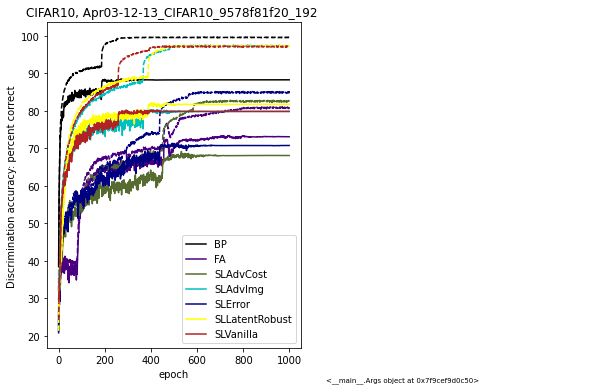

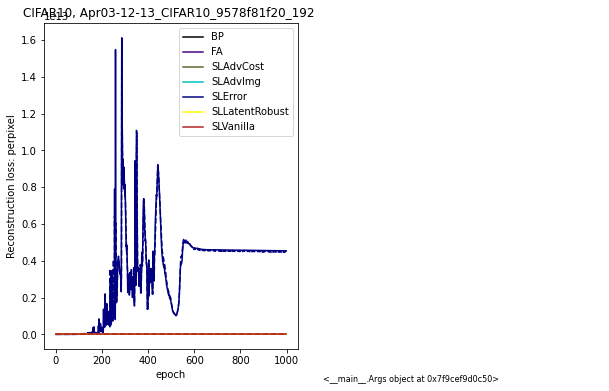

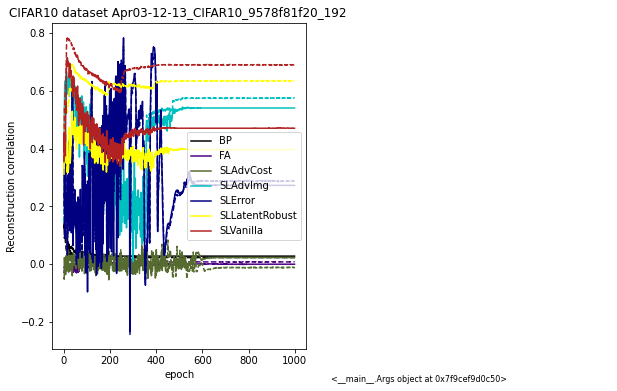

<Figure size 720x432 with 0 Axes>

In [18]:

%matplotlib inline


base_methods = ['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost','SLConv1', 'SLGrConv1', 'SLLatentRobust']
all_methods = copy.deepcopy(base_methods)

print(base_methods)
[all_methods.extend([m+'CC0'] )for m in base_methods]
[all_methods.extend([m+'CC1'] )for m in base_methods]
print(all_methods)
colors = {'BP':'k', 'FA':'indigo', 'SLVanilla':'firebrick','SLError':'navy', 'SLAdvImg':'c','SLAdvCost':'darkolivegreen','SLLatentRobust':'yellow',
               'BPCC0':'dimgrey', 'FACC0':'blueviolet', 'SLVanillaCC0':'r','SLErrorCC0':'blue', 'SLAdvImgCC0':'c','SLAdvCostCC0':'green','SLLatentRobustCC0':'khaki',
               'BPCC1':'lightgrey', 'FACC1':'mediumpurple', 'SLVanillaCC1':'salmon','SLErrorCC1':'lightsteelblue', 'SLAdvImgCC1':'c','SLAdvCostCC1':'lightgreen','SLLatentRobustCC1':'darkgoldenrod',
               'SLConv1':'sandybrown', 'SLGrConv1':'brown' }
# colors =  {'BP':'k', 'FA':'grey', 'SLVanilla':'r','SLRobust':'salmon',
#             'SLError':'orange', 'SLErrorTemplateGenerator':'yellow', 'BSL':'b','SLGAN':'m'}


methods = all_methods #['BP','FA','SLVanilla','SLGAN' ]#',,'SLRobust', 'SLError''SLRobust', 'SLError' ,'BSL',  'SLErrorTemplateGenerator' 'SLError', 

print(methods)

if args.eval_RDMs:
    RDMs_dict = {}
    layers = ['RDM_conv1_FF', 'RDM_conv1_FB', 'RDM_latents_FF', 'RDM_upsample2',]
    import h5py
    for method in  methods:
        hf = h5py.File(args.resultsdir+'RDMs_%s.h5'%method, 'r')
        
        RDM_list = [np.array(hf.get(layers[0])),
        np.array(hf.get(layers[1])),
        np.array(hf.get(layers[2])),
        np.array(hf.get(layers[3]))]
        RDMs_dict.update({method:RDM_list}) 

if len(args.eval_swept_var):
    if args.eval_swept_var=='sigma2':
        non_swept_var='epsilon'
        non_swept_var_value=0.0
        swept_vars = np.arange(0, 1.1, 0.1).tolist() #[0, 0.2, 0.4, 0.6, 0.8, 1]
    
    print(swept_vars)
    sigma2 = 0.0
    maxitr = 4
    Test_acce = {}
    # epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
    existing_methods = []
    for method in  methods:
        Test_acce_arr = np.zeros((4, len(swept_vars)))
        for iv , swept_var in enumerate(swept_vars):
            # json_name = '%s_%s_eval%s_maxitr4_epsilon%0.1e.json'%(args.runname, method, args.eval_time, epsilon)
            if args.eval_swept_var=='sigma2':
                json_name = '%s%s_%s_eval%s_maxitr%d_epsilon%0.1e_noisesigma2%.1f.json'%(args.databasedir,args.runname, method, args.eval_time, maxitr, non_swept_var_value, swept_var)
            else:
                json_name = '%s%s_%s_eval%s_maxitr%d_epsilon%0.1e_noisesigma2%.1f.json'%(args.databasedir,args.runname, method, args.eval_time, maxitr, swept_var, sigma2)
            print(json_name)
            try:
                with open(json_name, 'r') as fp:
                                
                    results = json.load(fp)   
                    Test_acce_arr[:, iv] = results['Test_acce']     
                    Test_acce.update({method:Test_acce_arr})
                existing_methods.append(method)
            except FileNotFoundError:
                continue

else:
    Test_acce = {}
    Train_acce = {}
    Test_lossd = {}
    Train_lossd = {}
    Test_lossl = {}
    Train_lossl = {}
    Test_corrd = {}
    Train_corrd = {}
    Learning_rate = {}
    
    Align_corr_first = {}
    Align_corr_last = {}
    
    Align_ratios_first = {}
    Align_ratios_last = {}
    
    Forward_norm_first = {}
    Forward_norm_last = {}
    
    existing_methods = []
    for method in  methods:
        
        try:
            with open('%s%s_%s.json'%(args.databasedir,args.runname, method), 'r') as fp:
                results = json.load(fp)        
                Test_acce.update({method:results['Test_acce']})
                Train_acce.update({method:results['Train_acce']})

                Test_lossd.update({method:results['Test_lossd']})
                Train_lossd.update({method:results['Train_lossd']})


                Test_lossl.update({method:results['Test_lossl']})
                Train_lossl.update({method:results['Train_lossl']})

                Test_corrd.update({method:results['Test_corrd']})
                Train_corrd.update({method:results['Train_corrd']})
                
                Learning_rate.update({method:results['lrF']})
                
                Align_corr_first.update({method:results['Alignments_corrs_first_layer']})
                Align_corr_last.update({method:results['Alignments_corrs_last_layer']})
                
                Align_ratios_first.update({method:results['Alignments_ratios_first_layer']})
                Align_ratios_last.update({method:results['Alignments_ratios_last_layer']})
                
                Forward_norm_first.update({method:results['Forward_norm_first_layer']})
                Forward_norm_last.update({method:results['Forward_norm_last_layer']})
                              
            existing_methods.append(method)
        except FileNotFoundError:
            print('%s%s_%s.json was not found'%(args.databasedir,args.runname, method))
            continue
                        

existing_methods = np.unique(existing_methods)


# args.resultsdir = args.resultsdir.replace('ConvMNIST_playground', 'SYY2020')
resultsdir = path_prefix + args.resultsdir.split('/Research')[1]
pp.pprint(vars(args))
# I used to save results into numpy files

# list_npy = find( '*.npy', resultsdir )
# print(list_npy)
# print(os.listdir(resultsdir))

# results = {}
# for f in list_npy:
#     print(f[:-4])
#     k = f[:-4].split('_')[0] + '_%s'%f[:-4].split('_')[1]
#     r = np.load(resultsdir + f)
#     results.update({k:r})
# print(results.keys())

if args.eval_RDMs:
    # bar plots
    corrs = [ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0] for l in range(4)]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[5.5,4])
    
    width = 0.35
    dist = width/4

    l=0
    axes.bar([0],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='1st layer-forward', color='salmon')
    l=1
    axes.bar([width+dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='1st layer-feedback',color='r')
    l=2
    axes.bar([0.5+3/2*width+2*dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='top layer-forward',color='lightblue')
    l=3
    axes.bar([0.5+5/2*width+3*dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='top layer-feedback',color='b')
    
    mixed_1st_layer_SLVanilla = np.concatenate((RDMs_dict['SLVanilla'][0].ravel(),RDMs_dict['SLVanilla'][1].ravel()))
    mixed_top_layer_SLVanilla = np.concatenate((RDMs_dict['SLVanilla'][2].ravel(),RDMs_dict['SLVanilla'][3].ravel()))

    mixed_1st_layer_BP = np.concatenate((RDMs_dict['BP'][0].ravel(),RDMs_dict['BP'][1].ravel()))
    mixed_top_layer_BP = np.concatenate((RDMs_dict['BP'][2].ravel(),RDMs_dict['BP'][3].ravel()))


    print('SHAPE',mixed_1st_layer_BP.shape)
    axes.bar([1+7/2*width+4*dist],1-ss.pearsonr(mixed_1st_layer_BP, mixed_1st_layer_SLVanilla)[0],width=width, label='1st layer-mixed',color='firebrick')
    axes.bar([1+9/2*width+5*dist],1-ss.pearsonr(mixed_top_layer_BP, mixed_top_layer_SLVanilla)[0],width=width, label='top layer-mixed',color='darkblue')
    
    
    
    axes.legend(loc='upper right')
    axes.set_ylabel('Dissimilarity between RSMs of SL and BP')
    axes.set_xticks([])
    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    fig.savefig(args.resultsdir+'Bars_RDMs_comparisons_%s.png'%(args.runname), dpi=200)
    fig.savefig(args.resultsdir+'Bars_RDMs_comparisons_%s.pdf'%(args.runname), dpi=200)
    plt.clf()

    #

    # RDM consistencies
    RDMs_consistencies = np.zeros((len(methods), len(methods), 4))
    for i, methodi in enumerate(methods):
        for j, methodj in enumerate(methods):
            for l in range(4):
                RDMs_consistencies[i, j , l] = ss.pearsonr(RDMs_dict[methodi][l].ravel(), RDMs_dict[methodj][l].ravel())[0]
                print(methodi,methodj,RDMs_consistencies[:,:,l ])
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[12,4])
    for l in range(4):
        im = axes[l].matshow(RDMs_consistencies[:, : , l], vmin=0, vmax=1, origin='lower', cmap=plt.cm.get_cmap('Spectral_r'))
        axes[l].set_xticks(range(len(methods)))
        axes[l].set_xticklabels(methods)
        if l ==0:
            axes[l].set_yticks(range(len(methods)))
            axes[l].set_yticklabels(methods)
        else:
            axes[l].set_yticks([])

        
        axes[l].set_title(layers[l][4:], y=1.25)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    fig.suptitle('Correlation between RDMs %s, %s'%(args.runname, args.dataset))
    plt.show()
#     fig.savefig(args.resultsdir+'RDMs_comparisons_%s.png'%(args.runname), dpi=200)
#     fig.savefig(args.resultsdir+'RDMs_comparisons_%s.pdf'%(args.runname), dpi=200)
#     plt.clf()

elif len(args.eval_swept_var):
    print(existing_methods)
    #------ accuracy ------------
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[20,4])

    for itr in range(4):
        for method in existing_methods:
            if itr == 3 :
                axes[itr].plot(swept_vars, Test_acce[method][itr], color=colors[method], label=method)
            else:
                axes[itr].plot(swept_vars, Test_acce[method][itr], color=colors[method])

        axes[itr].set_xlabel(args.eval_swept_var)
        axes[itr].set_ylabel('Discrimination accuracy: percent correct')
        axes[itr].set_title('itr = %d'%itr)
        axes[itr].set_ylim([0,100])
        

        fig.suptitle('%s dataset %s eval%s %s=%s'%(args.dataset, args.runname, args.eval_time, non_swept_var ,non_swept_var_value))

        # axes[1].set_xticks([])
        # axes[1].set_yticks([])
        # axes[1].axis('off')
        # txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
        # txt._get_wrap_line_width = lambda : 200

    axes[3].legend()

#     fig.savefig(resultsdir+'robust_results_eval%s_%s_%s.pdf'%(args.eval_time, non_swept_var,non_swept_var_value), dpi=200)
#     fig.savefig(resultsdir+'robust_results_eval%s_%s_%s.png'%(args.eval_time, non_swept_var,non_swept_var_value), dpi=200)

    plt.clf()


else:

    #------ accuracy ------------
    summary_dic_Train = {}
    summary_dic_Test = {}
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:
         
            axes[0].plot(Train_acce[method], color=colors[method], ls='--')
            axes[0].plot(Test_acce[method], color=colors[method], label=method)
        
            print('Train ACC','%s:'%method, Train_acce[method][-1], end =" ")
            print('**')
            print('Test ACC','%s:'%method, Test_acce[method][-1], end =" ")
            print('**')
            summary_dic_Train.update({method: [Train_acce[method][-1], Train_lossd[method][-1], Train_lossl[method][-1],Train_corrd[method][-1], len(Train_acce[method])]})
            summary_dic_Test.update({method: [Test_acce[method][-1], Test_lossd[method][-1], Test_lossl[method][-1],Test_corrd[method][-1], len(Test_acce[method])]})

    df_train = pd.DataFrame.from_dict(summary_dic_Train, orient='index', columns=['Accuracy', 'LossPixel','LossLatent','CorrPixel','Epoch'])
    df_train = df_train.sort_values('Accuracy', ascending=False)

    df_test = pd.DataFrame.from_dict(summary_dic_Test, orient='index', columns=['Accuracy', 'LossPixel','LossLatent','CorrPixel','Epoch'])
    df_test = df_test.sort_values('Accuracy', ascending=False)
    print('*Train*')
    print(df_train)
    print('*Test*')
    print(df_test)
    df_train.to_csv(args.resultsdir+'df_train_%s.csv'%args.runname, sep=',')
    df_test.to_csv(args.resultsdir+'df_test_%s.csv'%args.runname, sep=',')
    # # axes[0].plot(results['SLBP_Train'][:,1],  color='lightgrey', label='SLBP %.2f'%results['SLBP_Test'][0,1])
    # axes[0].plot(results['SLDecoderRobustOutput_Train'][:,1],  color='lightgrey', label='SLDecoderRobustOutput %.2f'%results['SLDecoderRobustOutput_Test'][0,1])

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Discrimination accuracy: percent correct')
    axes[0].set_title('%s, %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=7 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'acc_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'acc_results_%depochs.png'%args.epochs, dpi=200)
#     plt.show()
#     plt.clf()

    #------ reconstruction loss ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
    
    for method in existing_methods:
        
        axes[0].plot(Train_lossd[method], color=colors[method], ls='--')

        axes[0].plot(Test_lossd[method], color=colors[method], label=method)
  

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Reconstruction loss: perpixel')
    axes[0].set_title('%s, %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'lossd_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'lossd_results_%depochs.png'%args.epochs, dpi=200)

#     plt.clf()



    #------ reconstruction corr ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:


        axes[0].plot(Train_corrd[method], color=colors[method], ls='--')

        axes[0].plot(Test_corrd[method], color=colors[method], label=method)

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Reconstruction correlation')
    axes[0].set_title('%s dataset %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


# #     fig.savefig(resultsdir+'corrd_results_%depochs.pdf'%args.epochs, dpi=200)
# #     fig.savefig(resultsdir+'corrd_results_%depochs.png'%args.epochs, dpi=200)

#     plt.clf()
#     plt.show()

    #------ alignment corr ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:


        axes[0].plot(Align_corr_first[method], color=colors[method], ls='--',label=method)

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Alignment correlation')
    axes[0].set_title('%s dataset %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'corrd_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'corrd_results_%depochs.png'%args.epochs, dpi=200)

    plt.clf()
    plt.show()
    
    


In [19]:
 existing_methods

array(['BP', 'FA', 'SLAdvCost', 'SLAdvImg', 'SLError', 'SLLatentRobust',
       'SLVanilla'], dtype='<U14')

Text(0.5, 0.92, 'CIFAR10 dataset Apr03-12-13_CIFAR10_9578f81f20_192 ')

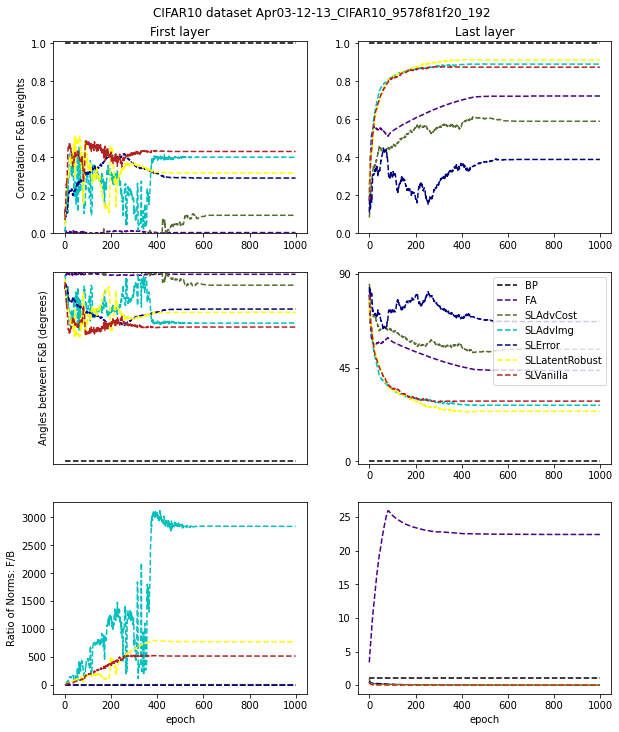

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[10,12])

for method in existing_methods:


    axes[0,0].plot(Align_corr_first[method], color=colors[method], ls='--',label=method)
    axes[0,1].plot(Align_corr_last[method], color=colors[method], ls='--',label=method)
    
    axes[1,0].plot(180*np.arccos(np.array(Align_corr_first[method]))/np.pi, color=colors[method], ls='--',label=method)
    axes[1,1].plot(180*np.arccos(np.array(Align_corr_last[method]))/np.pi, color=colors[method], ls='--',label=method)

    axes[2,0].plot(Align_ratios_first[method], color=colors[method], ls='--',label=method)
    axes[2,1].plot(Align_ratios_last[method], color=colors[method], ls='--',label=method)



axes[0,0].set_ylabel('Correlation F&B weights')
axes[1,0].set_ylabel('Angles between F&B (degrees)')
axes[2,0].set_ylabel('Ratio of Norms: F/B')

axes[0,0].set_ylim([0,1.01])
axes[0,1].set_ylim([0,1.01])
axes[1,0].set_ylim([-1,91])
axes[1,1].set_ylim([-1,91])

axes[1,0].set_yticks([0,45,90])
axes[1,1].set_yticks([0,45,90])

axes[1,1].legend()

axes[2,0].set_xlabel('epoch')
axes[2,1].set_xlabel('epoch')

axes[0,0].set_title('First layer')
axes[0,1].set_title('Last layer')

axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
# axes[1,0].axis('off')
# txt= axes[1,0].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
# txt._get_wrap_line_width = lambda : 200
fig.suptitle('%s dataset %s '%(args.dataset, args.runname), y=0.92)

#     fig.savefig(resultsdir+'Alignment_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'Alignment_results_%depochs.png'%args.epochs, dpi=200)



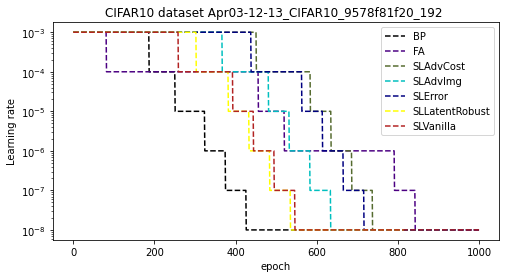

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[8,4])

for method in existing_methods:

    axes.plot(Learning_rate[method], color=colors[method], ls='--',label=method)
    
axes.set_yscale('log')

axes.set_xlabel('epoch')
axes.set_ylabel('Learning rate')
axes.set_title('%s dataset %s '%(args.dataset, args.runname))
axes.legend()



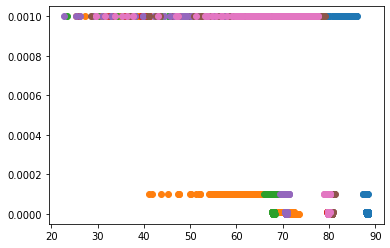

In [106]:
for method in existing_methods:
    plt.scatter(Test_acce[method],Learning_rate[method])
    ss.pearsonr(Test_acce[method],Learning_rate[method])

In [108]:
method='SLAdvImg'
print(ss.pearsonr(Test_acce[method],Learning_rate[method]))
print(ss.pearsonr(Test_corrd[method],Learning_rate[method]))

(-0.5944014199492644, 5.7736479588211e-91)
(-0.6651103048858464, 3.1688250041556924e-121)
